In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv("Final_data.csv")
print(df.columns)

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins',
       'Fats', 'Calories', 'meal_name', 'meal_type', 'diet_type', 'sugar_g',
       'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'cooking_method',
       'prep_time_min', 'cook_time_min', 'rating', 'Name of Exercise', 'Sets',
       'Reps', 'Benefit', 'Burns Calories (per 30 min)', 'Target Muscle Group',
       'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle',
       'Workout', 'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg',
       'pct_HRR', 'pct_maxHR', 'cal_balance', 'lean_mass_kg', 'expected_burn',
       'Burns Calories (per 30 min)_bc', 'Burns_Calories_Bin'],
      dtype='object')


# Note:
- cột 'is_healthy' có trên giải thích nhưng không có trong data
- Bỏ các cột: BMI_calc, cal_from_macros, pct_carbs, protein_per_kg, pct_HRR, pct_maxHR, cal_balance, lean_mass_kg
- Các cột bị bỏ là là do chỉ là tính toán lại từ các cột đã có và không có trên miêu tả data


In [35]:
discard = ["BMI_calc", "cal_from_macros", "pct_carbs", "protein_per_kg", "pct_HRR", "pct_maxHR", "cal_balance", "lean_mass_kg", "expected_burn", "Burns Calories (per 30 min)_bc", "Burns_Calories_Bin"]

discard_df = df[discard]
main_df = df.drop(discard, axis=1)
print("Number of columns left:", len(main_df.columns))
(main_df.columns)

    

Number of columns left: 43


Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins',
       'Fats', 'Calories', 'meal_name', 'meal_type', 'diet_type', 'sugar_g',
       'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'cooking_method',
       'prep_time_min', 'cook_time_min', 'rating', 'Name of Exercise', 'Sets',
       'Reps', 'Benefit', 'Burns Calories (per 30 min)', 'Target Muscle Group',
       'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle',
       'Workout'],
      dtype='object')

# Phân loại biến

In [34]:
import numpy as np
numeric_df = main_df.select_dtypes(include=[np.number])
numeric_cols = numeric_df.columns
print("Number of numeric columns: ", len(numeric_cols))
numeric_df

Number of numeric columns:  29


,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),...,sugar_g,sodium_mg,cholesterol_mg,serving_size_g,prep_time_min,cook_time_min,rating,Sets,Reps,Burns Calories (per 30 min)
0,34.91,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,26.800377,1.50,...,31.77,1729.94,285.05,120.47,16.24,110.79,1.31,4.99,20.91,342.58
1,23.37,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,27.655021,1.90,...,12.34,693.08,300.61,109.15,16.47,12.01,1.92,4.01,16.15,357.16
2,33.20,58.98,1.67,175.04,123.95,54.96,0.91,802.26,24.320821,1.88,...,42.81,2142.48,215.42,399.43,54.35,6.09,4.70,5.00,21.90,359.63
3,38.69,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,32.813572,2.50,...,9.34,123.20,9.70,314.31,27.73,103.72,4.85,4.01,16.92,351.65
4,45.09,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,17.307319,2.91,...,23.78,1935.11,116.89,99.22,34.16,46.55,3.07,4.99,15.01,329.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,46.77,98.31,1.90,199.20,148.18,63.72,0.77,761.61,27.505498,2.99,...,32.98,1241.30,243.54,190.52,41.69,91.78,4.31,4.99,17.14,346.27
19996,40.38,88.12,1.87,196.18,134.18,54.04,1.97,2303.13,26.180562,3.52,...,32.17,1853.10,188.76,468.81,20.80,12.98,1.90,5.01,23.08,332.64
19997,50.31,46.20,1.67,163.34,157.92,61.65,1.36,1468.80,23.331802,2.81,...,14.48,1808.43,80.47,244.51,23.04,61.14,2.01,4.00,18.91,352.19
19998,52.36,44.30,1.62,179.27,121.23,60.88,1.41,929.75,18.985868,1.59,...,13.68,2125.57,245.91,402.26,39.25,99.85,2.98,3.99,24.97,329.22


In [42]:
print(numeric_cols)
numeric_df.iloc[1]

Index(['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)',
       'Experience_Level', 'BMI', 'Daily meals frequency', 'Physical exercise',
       'Carbs', 'Proteins', 'Fats', 'Calories', 'sugar_g', 'sodium_mg',
       'cholesterol_mg', 'serving_size_g', 'prep_time_min', 'cook_time_min',
       'rating', 'Sets', 'Reps', 'Burns Calories (per 30 min)'],
      dtype='object')


Age                                23.370000
Weight (kg)                        56.410000
Height (m)                          1.550000
Max_BPM                           179.430000
Avg_BPM                           131.750000
Resting_BPM                        73.180000
Session_Duration (hours)            1.370000
Calories_Burned                  1809.910000
Fat_Percentage                     27.655021
Water_Intake (liters)               1.900000
Workout_Frequency (days/week)       4.000000
Experience_Level                    2.010000
BMI                                23.480000
Daily meals frequency               3.010000
Physical exercise                   0.970000
Carbs                             214.320000
Proteins                           85.410000
Fats                               56.970000
Calories                         1577.000000
sugar_g                            12.340000
sodium_mg                         693.080000
cholesterol_mg                    300.610000
serving_si

In [44]:
numeric_df[['Workout_Frequency (days/week)', 'Experience_Level', 'Daily meals frequency', 'Physical exercise', 'rating', 'Sets', 'Reps', ]]

,Workout_Frequency (days/week),Experience_Level,Daily meals frequency,Physical exercise,rating,Sets,Reps
0,3.99,2.01,2.99,0.01,1.31,4.99,20.91
1,4.00,2.01,3.01,0.97,1.92,4.01,16.15
2,2.99,1.02,1.99,-0.02,4.70,5.00,21.90
3,3.99,1.99,3.00,0.04,4.85,4.01,16.92
4,4.00,2.00,3.00,3.00,3.07,4.99,15.01
...,...,...,...,...,...,...,...
19995,3.02,1.00,3.03,0.00,4.31,4.99,17.14
19996,5.01,2.99,2.97,-0.03,1.90,5.01,23.08
19997,4.02,2.00,3.00,-0.01,2.01,4.00,18.91
19998,3.02,1.00,2.00,1.00,2.98,3.99,24.97


array([ 0.01,  0.97, -0.02,  0.04,  3.  , -0.04, -0.03,  0.  ,  0.02,
        2.99,  0.96,  1.  , -0.01,  1.01,  1.04,  0.03,  4.  ,  1.99,
        3.99, -0.05,  0.98,  2.02,  0.06,  0.05,  0.99,  4.02, -0.07,
        2.  ,  1.02,  1.03,  4.01,  3.02,  3.01,  2.01,  2.97,  3.98,
        1.05,  1.98,  4.04,  2.03,  3.97, -0.06,  0.95,  4.03,  1.96,
        2.98,  1.97,  2.05,  3.04,  3.95,  2.04,  3.03,  2.96,  0.94,
        0.07,  2.95,  2.94,  4.05,  3.96,  1.95,  1.06,  0.08,  3.06,
        1.07,  1.94,  3.05,  2.06])

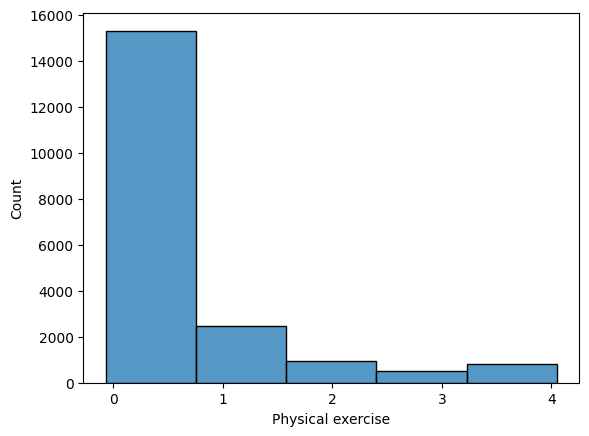

In [ ]:
sns.histplot(df[''],bins=5)
df['Physical exercise'].unique()
# sorted(df['Physical exercise'].unique().tolist())


In [64]:
df[df['Physical exercise'] < 0]
print(discard)
df[df['Physical exercise'] > 3.7]
df.iloc[45]
# df.iloc[2]


['BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg', 'pct_HRR', 'pct_maxHR', 'cal_balance', 'lean_mass_kg', 'expected_burn', 'Burns Calories (per 30 min)_bc', 'Burns_Calories_Bin']


Age                                                                     37.35
Gender                                                                 Female
Weight (kg)                                                             88.65
Height (m)                                                               1.79
Max_BPM                                                                182.36
Avg_BPM                                                                137.78
Resting_BPM                                                             67.81
Session_Duration (hours)                                                 1.74
Calories_Burned                                                       2490.11
Workout_Type                                                             HIIT
Fat_Percentage                                                       29.59749
Water_Intake (liters)                                                    3.47
Workout_Frequency (days/week)                                   

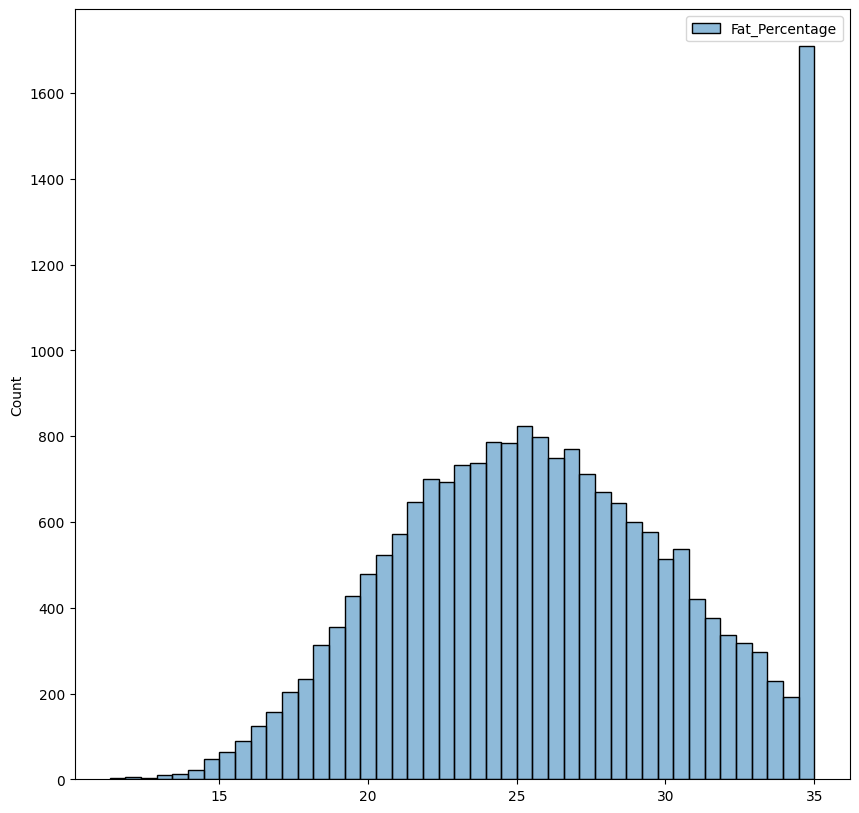

In [75]:
plt.figure(figsize=(10,10))
sns.histplot(pd.DataFrame(df['Fat_Percentage']))
plt.show()